# Flow of Remittances in the World

### Research
Since many people in low income-level countries emigrate to look for a better income, remittances inflow in these countries might be high. However, people in these countries also send remittances to their relatives in other countries, for several reason such as the education of their children. Thus, instead of considering only inflow of remittances in these countries, it is essential to compare the net remittances balance of low-income level countries with the ones of middle and high income level countries. Thus, our project is specific to the following question. Does the mean of the net remittance higher for low-income level countries, compared to other groups of countries?

### Preambule
We import the modules that will be used in the project. Pandas will be used to read the microsoft excel files. Matplotlib will be used to realize the graphic. 

The data used to answer the research question are provided on the website of the [World Bank](https://data.worldbank.org/). The three datasets used provide data about inflow of remittances, outflow of remittances, and historical threshold for classification of countries according to their income-level. 

In [1128]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [1129]:
outfl=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/Outward Remittance Flows Apr 2019.xlsx")
inflow=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/Remittance Inflows Apr 2019.xlsx")

# GNi classification: http://databank.worldbank.org/data/download/site-content/OGHIST.xls
# historical threshold for classification as low-income, middle-income, high-income countries
classif=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/OGHIST.xls",sheet_name="Country Analytical History")

# Population, by country, by year: https://data.worldbank.org/indicator/SP.POP.TOTL
popu=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/API_SP.POP.TOTL_DS2_en_excel_v2_103719.xls")

### Cleaning of data
In this section, we verify if there are some inaccurate records in the data, and we clean them when they are identified. We remove unecessary rows and columns; we also change the type of missing data that are string to NaN float type. In spite that all the three dataset are provided by the same institution, there are some differences in the name of the countries. We identify the differences in the spelling of the name of some countries from a dataset to another. Then, we correct them to have the same spelling for the three dataset.

In [1130]:
outfl.head()

,Outward Migrant Remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,Remittances as a share of GDP in 2017 (%),Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,524.163479,228.995995,182.926,138.003,NaN,0.00682002,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178.667079,153.258444,147.128,106.257,NaN,0.00812857,NaN,NaN,NaN,NaN
2,Algeria,165.0,150.0,126.0,157.0,141.0,131.0,101.0,82.272423,53.256539,...,295.922112,72.128991,76.6335,69.0571,NaN,0.000412146,NaN,NaN,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


In [1131]:
inflow.head()

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,LAC,MNA,SAR,SSA,OEC,NOC,LDCs,SmallStates,FragileStates,Developing
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1132]:
classif.head(15)

,Unnamed: 0,World Bank Analytical Classifications,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,(presented in World Development Indicators),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GNI per capita in US$ (Atlas methodology),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Bank's fiscal year:,FY89,FY90,FY91,FY92,FY93,FY94,FY95,FY96,...,FY11,FY12,FY13,FY14,FY15,FY16,FY17,FY18,FY19,FY20
4,NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,NaN,Low income (L),<= 480,<= 545,<= 580,<= 610,<= 635,<= 675,<= 695,<= 725,...,<= 995,"<= 1,005","<= 1,025","<= 1,035","<= 1,045","<= 1,045","<= 1,025","<= 1,005",<= 995,"<= 1,025"
6,NaN,Lower middle income (LM),"481-1,940","546-2,200","581-2,335","611-2,465","636-2,555","676-2,695","696-2,785","726-2,895",...,"996-3,945","1,006-3,975","1,026-4,035","1,036-4,085","1,046-4,125","1,046-4,125","1,026-4,035","1,006-3,955","996-3,895","1,026-3,995"
7,NaN,Upper middle income (UM),"1,941-6,000","2,201-6,000","2,336-6,000","2,466-7,620","2,556-7,910","2,696-8,355","2,786-8,625","2,896-8,955",...,"3,946-12,195","3,976-12,275","4,036-12,475","4,086-12,615","4,126-12,745","4,126-12,735","4,036-12,475","3,956-12,235","3,896-12,055","3,996-12,375"
8,NaN,High income (H),"> 6,000","> 6,000","> 6,000","> 7,620","> 7,910","> 8,355","> 8,625","> 8,955",...,"> 12,195","> 12,275","> 12,475","> 12,615","> 12,745","> 12,735","> 12,475","> 12,235","> 12,055","> 12,375"
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1133]:
popu.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Last Updated Date,2019-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0


In [1134]:
# Select only needed columns, and change the name of the columns of the countries
outfl=outfl.iloc[:,0:40]
inflow=inflow.iloc[:,0:40]
col1=list(outfl.columns)
col1.remove(col1[0])
col1.insert(0,"Countries")
outfl.columns=col1
inflow.columns=col1

# Do the same thing for the dataset of classification
classif=classif.iloc[:,1:41]
col2=list(range(1987,2019))
col2.insert(0,"Countries")
classif.columns=col2

# Do the same thing for the dataset of population
col3=[]
col3=list(range(1960,2019))
col3.insert(0,"Countries")
col3.insert(1,"Country code")
col3.insert(2,"Indicator name")
col3.insert(3,"Indicator code")
popu.columns=col3
col3.remove("Indicator name"); col3.remove("Indicator code");col3.remove("Country code")
popu=popu.loc[3:,col3]

# set index to Countries names for the three data frame
outfl=outfl.set_index("Countries")
inflow=inflow.set_index("Countries")
classif=classif.set_index("Countries")
popu=popu.set_index("Countries")

In [1135]:
# Select only rows related to the countries - Zimbabwe is the last country in all the data frames
inflow=inflow.loc[:"Zimbabwe",:]
outfl=outfl.loc[:"Zimbabwe",:]
classif=classif.loc["Afghanistan":"Zimbabwe",:]

In [1136]:
# verify if there is the same number of countries in each data frame. There is the same number of countries only for inflow
# and outfl.The data frame related to the classification of the country
[inflow.shape[0],outfl.shape[0],classif.shape[0],popu.shape[0]]

[214, 214, 218, 264]

In [1137]:
# This function looks for the differences between the names of the countries
def country_dif(x,y):
    x_only=[];y_only=[]
    for i in x:
        if i not in y:
            x_only.append(i)
    for j in y:
        if j not in x:
            y_only.append(j)
            
    
    return {"x_only":x_only,"y_only":y_only}#{"onlyInflow":only_inflow,"onlyOutfl":only_outfl}
#country_dif(x=inflow.Countries,y=outfl.Countries)

In [1138]:
country_dif(x=list(inflow.index),y=list(outfl.index))
#The data frames inflow and outfl have the same name for the countries.

{'x_only': [], 'y_only': []}

In [1139]:
country_dif(x=list(inflow.index),y=list(classif.index))
# Some countries appear only in inflow whereas some others appear only in classif.

{'x_only': ["Cote d'Ivoire",
  'Curacao',
  'Macedonia, FYR',
  'Sao Tome and Principe',
  'Swaziland'],
 'y_only': ['British Virgin Islands',
  "Côte d'Ivoire",
  'Curaçao',
  'Eswatini',
  'Gibraltar',
  'Nauru',
  'North Macedonia',
  'São Tomé and Principe',
  'Taiwan, China']}

In [1140]:
country_dif(x=list(inflow.index),y=list(popu.index))
# Some countries appear only in inflow whereas some others appear only in popu.

{'x_only': ['Faeroe Islands',
  'Korea, Dem. Rep.',
  'Macedonia, FYR',
  'Swaziland'],
 'y_only': ['Arab World',
  'Central Europe and the Baltics',
  'Caribbean small states',
  'East Asia & Pacific (excluding high income)',
  'Early-demographic dividend',
  'East Asia & Pacific',
  'Europe & Central Asia (excluding high income)',
  'Europe & Central Asia',
  'Euro area',
  'European Union',
  'Fragile and conflict affected situations',
  'Faroe Islands',
  'Gibraltar',
  'High income',
  'Heavily indebted poor countries (HIPC)',
  'IBRD only',
  'IDA & IBRD total',
  'IDA total',
  'IDA blend',
  'IDA only',
  'Not classified',
  'Latin America & Caribbean (excluding high income)',
  'Latin America & Caribbean',
  'Least developed countries: UN classification',
  'Low income',
  'Lower middle income',
  'Low & middle income',
  'Late-demographic dividend',
  'Middle East & North Africa',
  'Middle income',
  'North Macedonia',
  'Middle East & North Africa (excluding high income)',


In [1141]:
# Since some countries names are different in the data frame classif, we correct the names to be the same as in outfl and inflow
# where only the orthographes of the names are different
names={"Côte d'Ivoire","Curaçao","São Tomé and Principe"}
clasidx=list(classif.index)

def repname():
    y=[]
    for i in clasidx:
        if i=="Côte d'Ivoire":
            y.append("Cote d'Ivoire")
        elif i=="Curaçao":
            y.append("Curacao")
        elif i=="São Tomé and Principe":
            y.append("Sao Tome and Principe")
        else:
            y.append(i)
    return(y)
classif.index=repname() # correct the names of three countries in the data frame classif

In [1142]:
# Since some countries names are different in the data frame classif, we correct the names to be the same as in outfl and inflow
# where only the orthographes of the names are different
names={"Côte d'Ivoire","Curaçao","São Tomé and Principe"}
popuidx=list(popu.index)

def repname():
    y=[]
    for i in popuidx:
        if i=='Faroe Islands':
            y.append('Faeroe Islands')
        elif i=='Korea, Dem. People’s Rep.':
            y.append('Korea, Dem. Rep.')
        
        else:
            y.append(i)
    return(y)
popu.index=repname() # correct the names of three countries in the data frame classif

In [1143]:
country_dif(x=list(outfl.index),y=list(classif.index)) # verify if these three names appear
                                    # among the list of names that are different when comparing the data 
                                    # frames classif and outfl. The names where the orthographe were different are corrected.

{'x_only': ['Macedonia, FYR', 'Swaziland'],
 'y_only': ['British Virgin Islands',
  'Eswatini',
  'Gibraltar',
  'Nauru',
  'North Macedonia',
  'Taiwan, China']}

In [1144]:
country_dif(x=list(outfl.index),y=list(popu.index)) # verify if these three names appear
                                    # among the list of names that are different when comparing the data 
                                    # frames popu and outfl. The names where the orthographe were different are corrected.

{'x_only': ['Macedonia, FYR', 'Swaziland'],
 'y_only': ['Arab World',
  'Central Europe and the Baltics',
  'Caribbean small states',
  'East Asia & Pacific (excluding high income)',
  'Early-demographic dividend',
  'East Asia & Pacific',
  'Europe & Central Asia (excluding high income)',
  'Europe & Central Asia',
  'Euro area',
  'European Union',
  'Fragile and conflict affected situations',
  'Gibraltar',
  'High income',
  'Heavily indebted poor countries (HIPC)',
  'IBRD only',
  'IDA & IBRD total',
  'IDA total',
  'IDA blend',
  'IDA only',
  'Not classified',
  'Latin America & Caribbean (excluding high income)',
  'Latin America & Caribbean',
  'Least developed countries: UN classification',
  'Low income',
  'Lower middle income',
  'Low & middle income',
  'Late-demographic dividend',
  'Middle East & North Africa',
  'Middle income',
  'North Macedonia',
  'Middle East & North Africa (excluding high income)',
  'North America',
  'Nauru',
  'OECD members',
  'Other small 

In [1145]:
# Verify if all the data are float
def iffloat(x):
    '''This function return a data frame of the countries
        and years where the type of data are not float'''
    ba=[];bo=[]
    for i in x.index:
        
        for j in x.columns:
            if type(x.loc[i][j])==float:
                next
            elif type(x.loc[i][j])==str:
                ba.append(i) # Countries
                bo.append(j) # Years
        df=pd.DataFrame({"year":bo,"country":ba})          
    if df.shape[0]==0:
        return "The type of all data is float"
    else:
        return df
             

In [1146]:
# Verify if the all data are float in inflow
iffloat(inflow)

'The type of all data is float'

In [1147]:
# Verify if the all data are float in outfl
iffloat(outfl)

,year,country
0,2017,Aruba
1,2018,Austria
2,2018,Cambodia
3,2018,Cameroon
4,2018,China
5,2017,"Congo, Rep."
6,2017,French Polynesia
7,2018,India
8,2017,Kiribati
9,2017,Libya


In [1148]:
# Replace the empty strings by NaN in outfl and verify if the correction has been done
outfl=outfl.replace(' ',np.nan)
iffloat(outfl)

'The type of all data is float'

In [1149]:
# Verify if the all data are float in outfl
iffloat(popu)

'The type of all data is float'

### Comparison of the net flow of remittances by income-level
This section compares the mean of net remittance by group of countries, classified in terms of income-level. The classification used is the one of the World Bank, as indicated in the preambule. The World Bank use the [Atlas method](https://datahelpdesk.worldbank.org/knowledgebase/articles/378832-what-is-the-world-bank-atlas-method), to realize this classification.

To do this comparison, we:
* Create a new data frame which is the difference between inflow and outflow of remittances, for each country, for each year where data are available. The new data generated is the net remittance for each country, by year.
* Create a function that:
     * Groups net remittance by class, according to the income-level classification, for a year. This operation requires that we account for both the net remittance data frame and the classification data frame.
     * Calculate the mean of net remittance, by group of countries.
     * Iterate the first two previous operation for all years where data are available.
     * Return a data frame with the mean of the net remittance, by group of countries, for each year.

In [1150]:
# Balance of flow of remittances
balance=inflow.subtract(outfl)
balance.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-518.196241,-426.687924,-275.131799,-119.210213,-144.867608,-274.374906,112.315429,185.104224,240.237409,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1486.485395,1377.572433,1400.368219,1204.429535,1091.356372,1241.868374,1137.092436,1158.621999,1204.616676,NaN
Algeria,241.0,297.0,381.0,235.0,188.0,182.0,257.0,404.727577,325.743461,306.622165,...,2013.297594,2016.028624,1911.098395,1897.757381,1961.284190,2156.077888,1924.871009,1912.366504,1722.942884,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1151]:
def mean_class(x):
    '''Function that return the mean, by country group, by year'''
    def balance_net(y):
        bal=pd.DataFrame(x.loc[:,y])
        cl=pd.DataFrame(classif.loc[:,y])
        dff=pd.merge(bal,cl,left_index=True,right_index=True)
        dff.columns=[y,"Class"]
        df3=dff.groupby("Class").mean()
        return df3
    df_mean=pd.DataFrame(index=['H', 'L', 'LM', 'UM'])
    for i in x.columns:
        if i in classif.columns:
            df_mean=pd.merge(df_mean,balance_net(i),left_index=True,right_index=True)
    return df_mean


In [1152]:
def sum_class(x):
    '''Function that return the sum, by country group, by year'''
    import numpy as np
    
    def balance_net(y):
        bal=pd.DataFrame(x.loc[:,y])
        cl=pd.DataFrame(classif.loc[:,y])
        dff=pd.merge(bal,cl,left_index=True,right_index=True)
        dff.columns=[y,"Class"]
        df3=dff.groupby("Class").sum()
        return df3
    df_mean=pd.DataFrame(index=['H', 'L', 'LM', 'UM'])
    for i in x.columns:
        if i in classif.columns:
            df_mean=pd.merge(df_mean,balance_net(i),left_index=True,right_index=True)
    return df_mean


In [1153]:
# Mean of net remittance by country group, by year
MeanNet=mean_class(balance)
MeanNet.head()

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
H,-778.226394,-734.643633,-691.827063,-1011.182755,-1118.087690,-1296.182831,-1399.410662,-1135.530518,-1223.870420,-1273.634979,...,-2303.581130,-2607.237384,-2683.313407,-3041.936763,-3364.651641,-3066.831687,-2794.569484,-2997.684067,-3223.514286,-3025.890584
L,209.556157,177.273876,206.567905,384.134735,417.707722,432.765161,440.120615,395.514931,327.693284,414.520153,...,651.353913,767.086340,939.772282,1098.111993,1180.081387,611.226553,721.672580,696.850777,760.027493,NaN
LM,120.793008,149.202689,268.023474,229.315275,279.591453,321.150345,272.087747,338.710160,396.057082,416.970118,...,3814.155355,3232.702737,3848.884518,4822.573354,4833.044309,5322.342066,5366.605797,5341.348550,6293.608135,10644.836476
UM,405.902429,457.367769,373.075821,393.314932,491.890937,391.943547,330.436398,282.789424,169.955835,19.785129,...,100.769230,1781.306229,1889.817633,2151.073002,2382.754613,2548.529300,1844.506911,1936.497908,2563.482351,4939.632331


In [1154]:
# Sum of total population by country group, by year
SumPopu=sum_class(popu/1000000)
SumPopu.head()

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
H,795.735047,801.763835,811.991384,797.956140,804.591850,809.219165,815.552466,831.968426,884.920173,901.850915,...,1100.548554,1106.099566,1111.488690,1277.335239,1284.515739,1374.606238,1163.891616,1166.630561,1224.921906,1186.737873
L,2808.844789,2866.829263,2925.416746,3044.908047,3131.643618,3198.611279,3097.917343,3190.905442,3197.751690,3251.887870,...,826.718820,796.602714,818.069136,839.739085,842.803148,610.867779,626.283576,643.274619,714.506657,701.964535
LM,597.832517,733.457047,683.042394,666.553368,758.046452,926.665052,1085.877801,1088.062078,1146.604951,1118.126028,...,3877.814973,2535.661846,2555.475544,2551.680490,2605.163995,2884.460814,2936.196957,3019.114411,2977.953277,3022.905169
UM,395.732030,291.567513,381.821229,414.002215,604.772385,479.443948,499.393881,473.981729,440.469985,480.515442,...,1003.042200,2451.898591,2495.725427,2391.654390,2411.779769,2358.940998,2587.371663,2570.198710,2566.643255,2655.635719


<IPython.core.display.Javascript object>


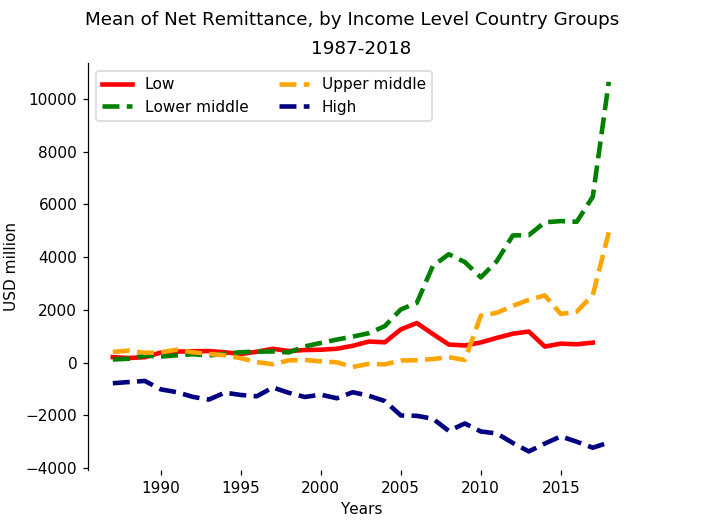

In [1155]:
plt.rc('font', size=10)  # change font size        


fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(MeanNet.loc["L"],linewidth=3,label="Low",color="red")
plt.plot(MeanNet.loc["LM"],"--",linewidth=3,label="Lower middle",color="green")
plt.plot(MeanNet.loc["UM"],"--",linewidth=3,label="Upper middle",color="orange")
plt.plot(MeanNet.loc["H"],"--",linewidth=3,label="High",color="navy")
plt.suptitle("Mean of Net Remittance, by Income Level Country Groups")
plt.title("1987-2018")
plt.xlabel("Years")
plt.ylabel("USD million")
# to remove frame
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(ncol=2)
fig.show()

<IPython.core.display.Javascript object>


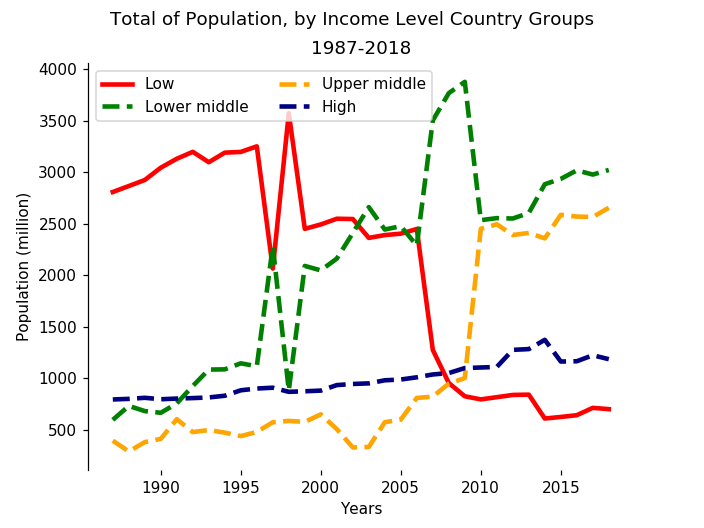

In [1156]:
plt.rc('font', size=10)  # change font size        


fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(SumPopu.loc["L","1987":],linewidth=3,label="Low",color="red")
plt.plot(SumPopu.loc["LM","1987":],"--",linewidth=3,label="Lower middle",color="green")
plt.plot(SumPopu.loc["UM","1987":],"--",linewidth=3,label="Upper middle",color="orange")
plt.plot(SumPopu.loc["H","1987":],"--",linewidth=3,label="High",color="navy")
plt.suptitle("Total of Population, by Income Level Country Groups")
plt.title("1987-2018")
plt.xlabel("Years")
plt.ylabel("Population (million)")
# to remove frame
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(ncol=2)
fig.show()

In [1048]:
# Create a new data frame that divide net remittance by population of each country, by year
netRemit_popu=balance.divide(popu)
netRemit_popu.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000018,-0.000015,-0.000009,-0.000004,-0.000004,-0.000008,0.000003,0.000005,0.000007,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000508,0.000473,0.000482,0.000415,0.000377,0.000430,0.000395,0.000403,0.000419,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000057,0.000056,0.000052,0.000051,0.000051,0.000055,0.000048,0.000047,0.000042,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1157]:
# Mean of net remittance by population, by country group and by year
MeanNetRemit_popu=mean_class(netRemit_popu*1000000)
MeanNetRemit_popu.head()

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
H,-41.401644,-36.435402,-17.876900,-40.564764,-43.036428,-40.843843,-35.033604,-14.535509,-175.423252,-171.434553,...,-104.580550,-210.646397,-324.177141,-326.194121,-336.774660,-361.982792,-267.278400,-301.635677,-327.431365,-1911.668049
L,1.366625,1.003466,0.869963,3.530930,4.507996,5.836280,6.386277,4.672818,4.910938,10.688817,...,33.970793,40.741929,50.963645,56.635375,47.246938,35.299123,44.444222,43.298333,48.271902,NaN
LM,44.240167,46.929526,49.176552,53.030058,44.819175,57.800298,52.125071,52.804560,62.330555,51.690720,...,152.101191,156.172139,183.390638,182.515446,190.617729,191.902889,185.884139,161.687682,156.237505,156.730010
UM,27.991621,38.037329,12.753516,48.672810,4.694382,11.408446,26.889033,41.058063,24.451507,31.325118,...,118.419563,131.763119,107.005256,110.371999,137.199672,139.391381,103.454931,150.718020,190.357910,238.880663


<IPython.core.display.Javascript object>


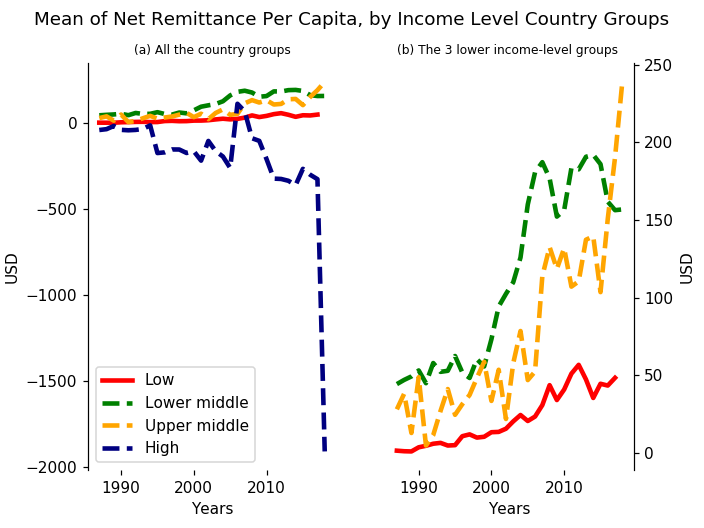

In [1158]:
plt.rc('font', size=10)  # change font size        


fig=plt.figure()

ax=fig.add_subplot(121)
ax.plot(MeanNetRemit_popu.loc["L"],linewidth=3,label="Low",color="red")
ax.plot(MeanNetRemit_popu.loc["LM"],"--",linewidth=3,label="Lower middle",color="green")
ax.plot(MeanNetRemit_popu.loc["UM"],"--",linewidth=3,label="Upper middle",color="orange")
ax.plot(MeanNetRemit_popu.loc["H"],"--",linewidth=3,label="High",color="navy")
plt.suptitle("Mean of Net Remittance Per Capita, by Income Level Country Groups")
plt.title("1987-2018")

ax.set_xlabel("Years")
ax.set_ylabel("USD")
ax.set_title("(a) All the country groups", fontsize=8)
# to remove frame
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

az=fig.add_subplot(122)

az.plot(MeanNetRemit_popu.loc["L"],linewidth=3,label="Low",color="red")
az.plot(MeanNetRemit_popu.loc["LM"],"--",linewidth=3,label="Lower middle",color="green")
az.plot(MeanNetRemit_popu.loc["UM"],"--",linewidth=3,label="Upper middle",color="orange")
az.set_xlabel("Years")
az.yaxis.tick_right()
az.yaxis.set_label_position("right")
az.set_ylabel("USD")
az.set_title("(b) The 3 lower income-level groups ", fontsize=8)
az.spines['top'].set_visible(False)
az.spines['left'].set_visible(False)
az.spines['right'].set_visible(True)
az.spines['bottom'].set_visible(False)


ax.legend()
fig.show()

### Conclusion
Figure 1 shows that, although low-income level countries are still net remittance receivers, considering the mean of net the mean amount they receive tends to decrease. However, the net remittance may tend to decrease because of a decrease of the population in low-income level countries. Some countries may switch from low-income level group to another. When considering the mean of the population by group of countries, we observe (see figure 2) that it tends to decrease since the end of the 1990s. 

Thus, instead of considering the mean of net remittance, we plot the mean of net remittance per capita. Figure 3 shows that the mean of net remittance per capita is increasing in low-income country group. However, it is decreasing for High-income level country group.